* Course No : CSE 4214 <br>
* Course Name: Pattern Recognition Lab <br>
* Group: A2 <br>
* Assignment No: 03 <br>
* Assignment Name: Implementing K-Nearest Neighbors (KNN)

In [1]:
from matplotlib import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab Notebooks/CSE 4214 Pattern Recognition Lab/Lab 4/

/content/drive/MyDrive/Colab Notebooks/CSE 4214 Pattern Recognition Lab/Lab 4


# Task 1

## Take input

In [4]:
df_train = pd.read_csv('train_knn.txt',sep=",",dtype = 'int32',names = ['x1','x2','label'])
df_train

,x1,x2,label
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1
7,3,4,2
8,2,3,2
9,3,2,2


## Plot the points

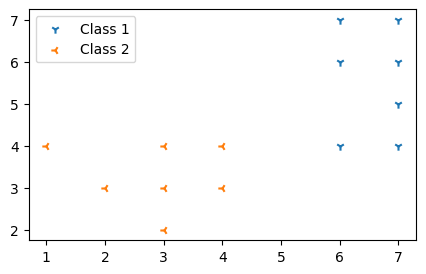

In [5]:
plt.figure(figsize=(5,3))
plt.scatter(x= df_train[df_train['label']==1]['x1'],y=df_train[df_train['label']==1]['x2'],marker='1',label='Class 1')
plt.scatter(x= df_train[df_train['label']==2]['x1'],y=df_train[df_train['label']==2]['x2'],marker='3',label='Class 2')
plt.legend()
plt.show()

# Task 2

## Implement KNN algorithm

In [6]:
def distance_calculate(x1,x2):
    return (x1[0]-x2[0])**2 + (x1[1]-x2[1])**2

In [7]:
def knn(p,k):
    data = np.array(df_train)
    distance = []

    for coordinates in data:
        distance.append((distance_calculate(p,coordinates),coordinates[-1]))

    distance.sort()
    distance = np.array(distance)
    c = Counter(distance[:k,1])
    return int(c.most_common()[0][0]), distance[:k]

## Classify test data

In [8]:
df_test = pd.read_csv('test_knn.txt',sep=",",dtype = 'int32',names = ['x1','x2'])
df_test

,x1,x2
0,3,7
1,7,7
2,4,3
3,2,8
4,3,5
5,1,2
6,4,8
7,8,3
8,8,4


## Take value for K

In [9]:
k = int(input('Input the value of K: '))

Input the value of K: 3


# Task 3

## Print the top K distances along with their class labels

In [10]:
testPoint = np.array(df_test)

predictions = []
save_path = 'prediction.txt'

with open(save_path, 'w') as f:
    for point in testPoint:
        label,distance = knn(point,k)

        print(f'Test Point: {point[0]},{point[1]}')
        f.write(f'Test Point: {point[0]},{point[1]}\n')

        for ind, d in enumerate(distance,start = 1):
            print(f'Distance {ind}: {d[0]} \t Class: {d[1]}')
            f.write(f'Distance {ind}: {d[0]} \t Class: {d[1]}\n')

        print(f'Predicted class: {label}')
        f.write(f'Predicted class:{label}\n')
        f.write('\n')
        print()
        predictions.append([point[0],point[1],label])
predictions = np.array(predictions)

Test Point: 3,7
Distance 1: 9 	 Class: 1
Distance 2: 9 	 Class: 2
Distance 3: 10 	 Class: 1
Predicted class: 1

Test Point: 7,7
Distance 1: 0 	 Class: 1
Distance 2: 1 	 Class: 1
Distance 3: 1 	 Class: 1
Predicted class: 1

Test Point: 4,3
Distance 1: 0 	 Class: 2
Distance 2: 1 	 Class: 2
Distance 3: 1 	 Class: 2
Predicted class: 2

Test Point: 2,8
Distance 1: 17 	 Class: 1
Distance 2: 17 	 Class: 2
Distance 3: 17 	 Class: 2
Predicted class: 2

Test Point: 3,5
Distance 1: 1 	 Class: 2
Distance 2: 2 	 Class: 2
Distance 3: 4 	 Class: 2
Predicted class: 2

Test Point: 1,2
Distance 1: 2 	 Class: 2
Distance 2: 4 	 Class: 2
Distance 3: 4 	 Class: 2
Predicted class: 2

Test Point: 4,8
Distance 1: 5 	 Class: 1
Distance 2: 8 	 Class: 1
Distance 3: 10 	 Class: 1
Predicted class: 1

Test Point: 8,3
Distance 1: 2 	 Class: 1
Distance 2: 5 	 Class: 1
Distance 3: 5 	 Class: 1
Predicted class: 1

Test Point: 8,4
Distance 1: 1 	 Class: 1
Distance 2: 2 	 Class: 1
Distance 3: 4 	 Class: 1
Predicted class:

In [11]:
predictions

array([[3, 7, 1],
       [7, 7, 1],
       [4, 3, 2],
       [2, 8, 2],
       [3, 5, 2],
       [1, 2, 2],
       [4, 8, 1],
       [8, 3, 1],
       [8, 4, 1]])

## Classify the test points

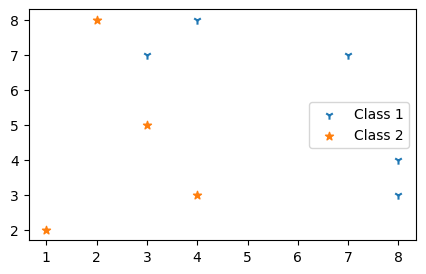

In [12]:
plt.figure(figsize=(5,3))
plt.scatter(x= predictions[predictions[:,2]==1][:,0],y=predictions[predictions[:,2]==1][:,1],marker='1',label='Class 1')
plt.scatter(x= predictions[predictions[:,2]==2][:,0],y=predictions[predictions[:,2]==2][:,1],marker='*',label='Class 2')
plt.legend()
plt.show()